<a href="https://colab.research.google.com/github/soroushosanlou/DeepLearning/blob/main/CNN_SoroushOsanlou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir dataset
!wget !wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/homework/ex2-conv-cifar10-in-colab.ipynb -P dataset

--2021-06-17 12:16:26--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2021-06-17 12:16:26--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/homework/ex2-conv-cifar10-in-colab.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29527 (29K) [text/plain]
Saving to: ‘dataset/ex2-conv-cifar10-in-colab.ipynb’

ex2-conv-cifar10-in 100%[===================>]  28.83K  --.-KB/s    in 0s      

2021-06-17 12:16:26 (128 MB/s) - ‘dataset/ex2-conv-cifar10-in-colab.ipynb’ saved [29527/29527]

FINISHED --2021-06-17 12:16:26--
Total wall clock time: 0.1s
Downloaded: 1 files, 29K in 0s (128 MB/s)


In [24]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


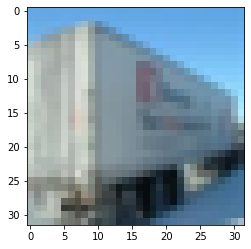

In [27]:
plt.imshow(x_train[15])



In [28]:
#پاسخ سوال 1
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [29]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [30]:
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

In [31]:
len(np.unique(y_train))

10

In [32]:
# پاسخ سوال 2
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [33]:
y_train[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
# پاسخ سوال 3
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [21]:
#پاسخ سوال 4
opt_rms = keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt_rms,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [22]:
#پاسخ سوال 5
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]


In [23]:
history = model.fit(x_train, y_train,
          epochs=25, batch_size=64, validation_data = (x_val, y_val))

Epoch 1/25
782/782 [==============================] - 45s 5ms/step - loss: 2.0104 - accuracy: 0.2524 - val_loss: 1.6195 - val_accuracy: 0.4200
Epoch 2/25
782/782 [==============================] - 3s 4ms/step - loss: 1.5682 - accuracy: 0.4347 - val_loss: 1.4387 - val_accuracy: 0.4350
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 1.4058 - accuracy: 0.4976 - val_loss: 1.2533 - val_accuracy: 0.5350
Epoch 4/25
782/782 [==============================] - 3s 4ms/step - loss: 1.3181 - accuracy: 0.5313 - val_loss: 1.2605 - val_accuracy: 0.5300
Epoch 5/25
782/782 [==============================] - 3s 4ms/step - loss: 1.2472 - accuracy: 0.5567 - val_loss: 1.2162 - val_accuracy: 0.5300
Epoch 6/25
782/782 [==============================] - 3s 4ms/step - loss: 1.2029 - accuracy: 0.5757 - val_loss: 1.1736 - val_accuracy: 0.5100
Epoch 7/25
782/782 [==============================] - 3s 4ms/step - loss: 1.1515 - accuracy: 0.5929 - val_loss: 1.2300 - val_accuracy: 0.5250
Epoch

In [25]:
# پاسخ سوال 6
opt_rms = keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt_rms,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [26]:
history = model.fit(x_train, y_train,
          epochs=40, batch_size=64, validation_data = (x_val, y_val))

Epoch 1/40
782/782 [==============================] - 4s 5ms/step - loss: 0.8830 - accuracy: 0.6887 - val_loss: 0.8702 - val_accuracy: 0.6450
Epoch 2/40
782/782 [==============================] - 3s 4ms/step - loss: 0.8710 - accuracy: 0.6938 - val_loss: 0.9448 - val_accuracy: 0.6300
Epoch 3/40
782/782 [==============================] - 3s 4ms/step - loss: 0.8541 - accuracy: 0.7023 - val_loss: 0.8466 - val_accuracy: 0.6800
Epoch 4/40
782/782 [==============================] - 3s 4ms/step - loss: 0.8560 - accuracy: 0.7010 - val_loss: 0.8633 - val_accuracy: 0.6550
Epoch 5/40
782/782 [==============================] - 3s 4ms/step - loss: 0.8444 - accuracy: 0.7041 - val_loss: 0.8045 - val_accuracy: 0.6850
Epoch 6/40
782/782 [==============================] - 3s 4ms/step - loss: 0.8415 - accuracy: 0.7052 - val_loss: 0.8554 - val_accuracy: 0.6650
Epoch 7/40
782/782 [==============================] - 3s 4ms/step - loss: 0.8221 - accuracy: 0.7067 - val_loss: 0.8332 - val_accuracy: 0.6800
Epoch 

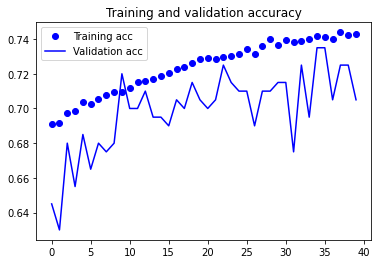

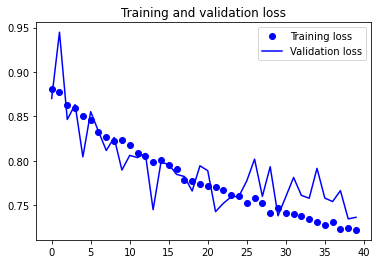

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()